In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# 1. Data Understanding

In [2]:
# read in dataset
dataset = pd.read_csv('./final_data.csv', engine = 'python')

In [3]:
dataset.head()

,movie_id,original_title,budget,runtime,revenue,original_language,overview,popularity,release_date,status,...,combined_reviews,revenue_class,polarity,genres,keywords,production_companies,production_countries,cast,director,afinn
0,10588,The Cat in the Hat,109000000,82,133960541,en,Conrad and Sally Walden are home alone with th...,18.251129,21 11 2003,Released,...,The Cat in the Hat is close to the dirtiest mo...,Class 7,0.038924,"['Comedy', 'Fantasy', 'Family']","['cat', 'brother sister relationship', 'boredo...","['Imagine Entertainment', 'DreamWorks SKG', 'U...",['United States of America'],"['Mike Myers', 'Dakota Fanning', 'Spencer Bres...",Bo Welch,103.0
1,51052,Arthur Christmas,85000000,97,147419472,en,"Each Christmas, Santa and his vast army of hig...",19.836830,22 02 2011,Released,...,Arthur Claus (James McAvoy) is the bumbling so...,Class 7,0.237620,"['Drama', 'Animation', 'Family', 'Comedy']","['holiday', 'santa claus', 'duringcreditssting...","['Columbia Pictures', 'Aardman Animations', 'S...",['United States of America'],"['James McAvoy', 'Hugh Laurie', 'Bill Nighy', ...",Barry Cook,1220.0
2,12096,The Pink Panther,80000000,93,158851357,en,When the coach of the France soccer team is ki...,25.450534,18 01 2006,Released,...,"I can see how this take on ""The Pink Panther"" ...",Class 8,0.033733,"['Action', 'Comedy', 'Crime', 'Mystery', 'Fami...","['robbery', 'investigation', 'inspector', 'kil...","['Columbia Pictures', 'International Productio...",['United States of America'],"['Steve Martin', 'Kevin Kline', 'Jean Reno', '...",Shawn Levy,91.0
3,161795,DÃ?Â©jÃ?Â Vu,80000000,117,181038616,en,L.A. shop owner Dana and Englishman Sean meet ...,0.605645,22 04 1998,Released,...,I can understand that `Déjà vu' isn't everyone...,Class 8,0.149133,"['Romance', 'Drama']","['love', 'american', 'pin', 'stranger', 'ruby']","['Rainbow Film Company, The', 'Revere Entertai...",['United States of America'],"['Stephen Dillane', 'Victoria Foyt', 'Vanessa ...",Henry Jaglom,212.0
4,10395,Wolf,70000000,125,131002597,en,Publisher Will Randall becomes a werewolf and ...,13.758526,17 06 1994,Released,...,I like this film. It is different as a horror ...,Class 7,0.184575,['Fantasy'],"['adultery', 'heal', 'bite', 'werewolf']",['Columbia Pictures'],['United States of America'],"['Jack Nicholson', 'Christopher Plummer', 'Jam...",Mike Nichols,450.0


In [4]:
# examine dimension of dataset
dataset.shape

(4362, 38)

In [5]:
# exclude rows with revenue = 0
dataset = dataset[dataset.revenue > 0]

In [6]:
# exclude rows with budget = 0
dataset = dataset[dataset.budget > 0]

In [7]:
dataset.shape

(4157, 38)

In [8]:
# helper function to list descriptive statistics for each variable
def examine_dataframe(df):
    for name in df.columns:
        print ("-----------------------------------")
        if df[name].dtype is np.dtype('O'):
            print (df[name].value_counts())
        else:
            print (df[name].describe())

In [9]:
# count the number of null values in each column
dataset.isnull().sum()

movie_id                          0
original_title                    0
budget                            0
runtime                           0
revenue                           0
original_language                 0
overview                          0
popularity                        0
release_date                      0
status                            0
tagline                         564
vote_average                      0
vote_count                        0
genres_1_name                     4
genres_2_name                   755
keywords_1_name                 254
keywords_2_name                 473
keywords_3_name                 703
keywords_4_name                 989
keywords_5_name                1330
production_companies_1_name     222
production_companies_2_name    1109
production_country_name         110
director_name                    13
music_composer_name            1600
actor_1_name                     22
actor_2_name                     28
actor_3_name                

In [10]:
# peek at unique values in genres_1_name
#dataset['genres_1_name'].unique() # total of 20 levels
dataset.genres_1_name.value_counts() 

Drama              1024
Comedy              955
Action              673
Adventure           309
Horror              248
Crime               164
Thriller            146
Animation           107
Fantasy             103
Romance              91
Science Fiction      87
Documentary          67
Family               46
Mystery              35
Music                29
War                  21
Western              21
History              21
comedy                2
TV Movie              2
Foreign               2
Name: genres_1_name, dtype: int64

In [11]:
# locate the 2 rows with genre = 'comedy'
dataset.loc[dataset.genres_1_name == 'comedy', :]

,movie_id,original_title,budget,runtime,revenue,original_language,overview,popularity,release_date,status,...,combined_reviews,revenue_class,polarity,genres,keywords,production_companies,production_countries,cast,director,afinn
510,219716,Sparkler,1000000,96,5494,en,Melba is a Californian trailer-park girl who i...,0.547654,19 03 1999,Released,...,I avoided this movie for the longest time beca...,Class 1,0.149117,[],[],[],[],"['Park Overall', 'Veronica Cartwright', 'Fredd...",Darren Stein,162.0
592,281189,Gory Gory Hallelujah,425000,96,12604,en,Four actors compete for the role of Jesus - a ...,0.033883,11 05 2003,Released,...,A friend of mine was able to get ahold of a DV...,Class 1,0.136483,[],['woman director'],[],[],[],Sue Corcoran,241.0


In [12]:
# check movies with missing value in genre
dataset[dataset.genres_1_name.isnull()]

,movie_id,original_title,budget,runtime,revenue,original_language,overview,popularity,release_date,status,...,combined_reviews,revenue_class,polarity,genres,keywords,production_companies,production_countries,cast,director,afinn
411,346081,Sardaarji,2700000,0,8200000,en,A ghost hunter uses bottles to capture trouble...,0.296981,26 06 2015,Released,...,"I attended an advance screening of ""My Week Wi...",Class 2,0.186064,[],[],[],['India'],[],Rohit Jugraj,436.0
426,371085,Sharkskin,2100000,0,4233,en,The Post War II story of Manhattan born Mike E...,0.027801,1 01 2015,Released,...,Look mob movies are basically period pieces...,Class 1,0.035256,[],[],[],[],[],NaN,-2.0
503,206412,Lisa Picard Is Famous,1000000,90,113433,en,A documentarian decides to follow the career o...,0.690089,14 05 2000,Released,...,"Historically, Hollywood has done a lousy job o...",Class 1,0.149892,[],[],[],[],"['Laura Kirk', 'Nat DeWolf', 'Griffin Dunne', ...",Griffin Dunne,254.0
1367,48382,"The Book of Mormon Movie, Volume 1: The Journey",2000000,120,1672730,en,The story of Lehi and his wife Sariah and thei...,0.031947,9 12 2003,Released,...,The problem with the Book of Mormon Movie is t...,Class 2,0.074532,[],[],[],[],"['Kirby Heyborne', 'Michael Flynn']",NaN,168.0


In [13]:
# impute values in genres_1_name
dataset.loc[411, 'genres_1_name'] = 'Comedy'
dataset.loc[426, 'genres_1_name'] = 'Comedy'
dataset.loc[503, 'genres_1_name'] = 'Comedy'
dataset.loc[1367, 'genres_1_name'] = 'Drama'
dataset.loc[510, 'genres_1_name'] = 'Comedy'
dataset.loc[592, 'genres_1_name'] = 'Comedy'

In [14]:
# check distribution of revenue_class
dataset.revenue_class.value_counts().sort_index()

Class 1    481
Class 2    674
Class 3    480
Class 4    574
Class 5    438
Class 6    386
Class 7    340
Class 8    222
Class 9    562
Name: revenue_class, dtype: int64

In [15]:
# check the rows with runtime = 0 -> 6 rows (402, 411, 426, 486, 513, 1422)
dataset.loc[dataset.runtime == 0, :]

,movie_id,original_title,budget,runtime,revenue,original_language,overview,popularity,release_date,status,...,combined_reviews,revenue_class,polarity,genres,keywords,production_companies,production_countries,cast,director,afinn
402,281230,Fort McCoy,3000000,0,78948,en,Unable to serve in World War II because of a h...,0.384496,1 01 2014,Released,...,I walked in with zero expectations and ended u...,Class 1,0.104227,"['War', 'Drama', 'History']",['woman director'],[],[],"['Eric Stoltz', 'Kate Connor', 'Lyndsy Fonseca...",Michael Worth,85.0
411,346081,Sardaarji,2700000,0,8200000,en,A ghost hunter uses bottles to capture trouble...,0.296981,26 06 2015,Released,...,"I attended an advance screening of ""My Week Wi...",Class 2,0.186064,[],[],[],['India'],[],Rohit Jugraj,436.0
426,371085,Sharkskin,2100000,0,4233,en,The Post War II story of Manhattan born Mike E...,0.027801,1 01 2015,Released,...,Look mob movies are basically period pieces...,Class 1,0.035256,[],[],[],[],[],NaN,-2.0
486,102840,Sex With Strangers,1100000,0,247740,en,"For some married couples, sex is an obsession ...",0.014406,22 02 2002,Released,...,As a long-time aficionado of this and similar ...,Class 1,0.111336,['Documentary'],[],[],[],[],NaN,90.0
513,357441,Karachi se Lahore,1000000,0,17721,en,A road trip from Karachi to Lahore where 5 fri...,0.060003,31 07 2015,Released,...,I went to watch the movie after hearing that i...,Class 1,0.127806,"['Family', 'Comedy']",[],[],['Pakistan'],"['Shehzad Sheikh', 'Ayesha Omar', 'Yasir Hussa...",NaN,277.0
1422,66468,N-Secure,1600000,0,2592808,en,N-Secure is a no holds-barred thrilling drama ...,0.134560,15 10 2010,Released,...,This movie was almost a total waste of time if...,Class 2,0.061313,"['Drama', 'Crime', 'Thriller']",[],[],[],"['Cordell Moore', 'Essence Atkins', 'Denise Bo...",David M. Matthews,-37.0


In [16]:
# distribution of director_name 
#dataset.director_name.value_counts().sort_index()
dataset.director_name.nunique() 

1912

In [17]:
# distribution of production_companies_1_name 
#dataset.director_name.value_counts().sort_index()
dataset.production_companies_1_name.nunique() 

994

In [18]:
# distribution of production_country_name 
dataset.production_country_name.nunique() 

53

In [ ]:
# rename several columns by using the 'rename' method
dataset.rename(columns={'genres_1_name':'genre', 'production_companies_1_name':'production_co', 'production_country_name':'prod_country'}, inplace=True)
dataset.columns

# 2. Feature Engineering

In [19]:
# since both budget and revenue distribution are highly skewed, take log
dataset['revenue_log'] = np.log(dataset['revenue'])
dataset['budget_log'] = np.log(dataset['budget'])

In [20]:
# classify revenue class into 3 level categorical variable
dataset['gross_level'] = dataset['revenue'].apply(lambda value: ('low' if value < 20000000 else 'medium') if value <= 100000000 else 'high')
dataset['gross_level'] = pd.Categorical(dataset['gross_level'], categories=['low', 'medium', 'high'])

In [21]:
# check distribution of gross_level
dataset.gross_level.value_counts()

low       1633
medium    1400
high      1124
Name: gross_level, dtype: int64

In [ ]:
# replace all spaces with underscores in the director column by using the 'str.replace' method
dataset.director = dataset.director.str.replace(' ', '_')
#dataset.director

In [ ]:
# replace all spaces with underscores in the production company column by using the 'str.replace' method
dataset.production_co = dataset.production_co.str.replace(' ', '_')

In [ ]:
# one-hot encoding to transform all categorical variables to numerical variables
cat_vars=['genre','director','production_co', 'prod_country']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dataset[var], prefix=var)
    train_dummy = dataset.join(cat_list)
    dataset = train_dummy
    
train_vars = dataset.columns.values.tolist()
train_keep = [i for i in train_vars if i not in cat_vars]
dataset = dataset[train_keep]

In [22]:
dataset['reviews_len'] = dataset.combined_reviews.astype(list).apply(len)

## Descriptive statistics

In [27]:
round(dataset.describe(), 2)

,movie_id,budget,runtime,revenue,popularity,vote_average,vote_count,polarity,afinn,revenue_log,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
count,4157.00,4.157000e+03,4157.00,4.157000e+03,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00,...,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00
mean,47647.27,3.458008e+07,108.07,9.683178e+07,23.58,6.17,769.32,0.13,377.25,16.84,...,0.01,0.06,0.01,0.01,0.02,0.02,0.00,0.04,0.01,0.01
std,77056.11,4.140284e+07,20.84,1.700102e+08,33.34,1.00,1295.42,0.06,306.64,2.48,...,0.07,0.24,0.08,0.09,0.15,0.14,0.02,0.18,0.07,0.07
min,5.00,1.000000e+00,0.00,4.230000e+02,0.00,0.00,0.00,-0.08,-1230.00,6.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8617.00,7.000000e+06,95.00,7.808524e+06,6.13,5.60,77.00,0.10,167.00,15.87,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,13374.00,2.000000e+07,104.00,3.480840e+07,14.96,6.20,293.00,0.14,370.00,17.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,46829.00,4.500000e+07,118.00,1.095023e+08,30.91,6.80,852.00,0.17,569.00,18.51,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,426469.00,3.800000e+08,338.00,2.787965e+09,875.58,10.00,13752.00,0.37,1614.00,21.75,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4157 entries, 0 to 4361
Data columns (total 62 columns):
movie_id                       4157 non-null int64
original_title                 4157 non-null object
budget                         4157 non-null int64
runtime                        4157 non-null int64
revenue                        4157 non-null int64
original_language              4157 non-null object
overview                       4157 non-null object
popularity                     4157 non-null float64
release_date                   4157 non-null object
status                         4157 non-null object
tagline                        3593 non-null object
vote_average                   4157 non-null float64
vote_count                     4157 non-null int64
genres_1_name                  4157 non-null object
genres_2_name                  3402 non-null object
keywords_1_name                3903 non-null object
keywords_2_name                3684 non-null object
keywords_3_n

In [29]:
# descriptive statistics on numerical variables
#cols = ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'polarity', 'revenue', 'budget_log', 'revenue_log']
cols = ['popularity', 'vote_average', 'vote_count', 'polarity', 'runtime', 'budget_log', 'budget', 'afinn', 'reviews_len', 'revenue']
round(dataset[cols].describe(), 2)

,popularity,vote_average,vote_count,polarity,runtime,budget_log,budget,afinn,reviews_len,revenue
count,4157.00,4157.00,4157.00,4157.00,4157.00,4157.00,4.157000e+03,4157.00,4157.00,4.157000e+03
mean,23.58,6.17,769.32,0.13,108.07,16.53,3.458008e+07,377.25,46849.44,9.683178e+07
std,33.34,1.00,1295.42,0.06,20.84,1.64,4.140284e+07,306.64,15166.48,1.700102e+08
min,0.00,0.00,0.00,-0.08,0.00,0.00,1.000000e+00,-1230.00,305.00,4.230000e+02
25%,6.13,5.60,77.00,0.10,95.00,15.76,7.000000e+06,167.00,37152.00,7.808524e+06
50%,14.96,6.20,293.00,0.14,104.00,16.81,2.000000e+07,370.00,46334.00,3.480840e+07
75%,30.91,6.80,852.00,0.17,118.00,17.62,4.500000e+07,569.00,56228.00,1.095023e+08
max,875.58,10.00,13752.00,0.37,338.00,19.76,3.800000e+08,1614.00,107020.00,2.787965e+09


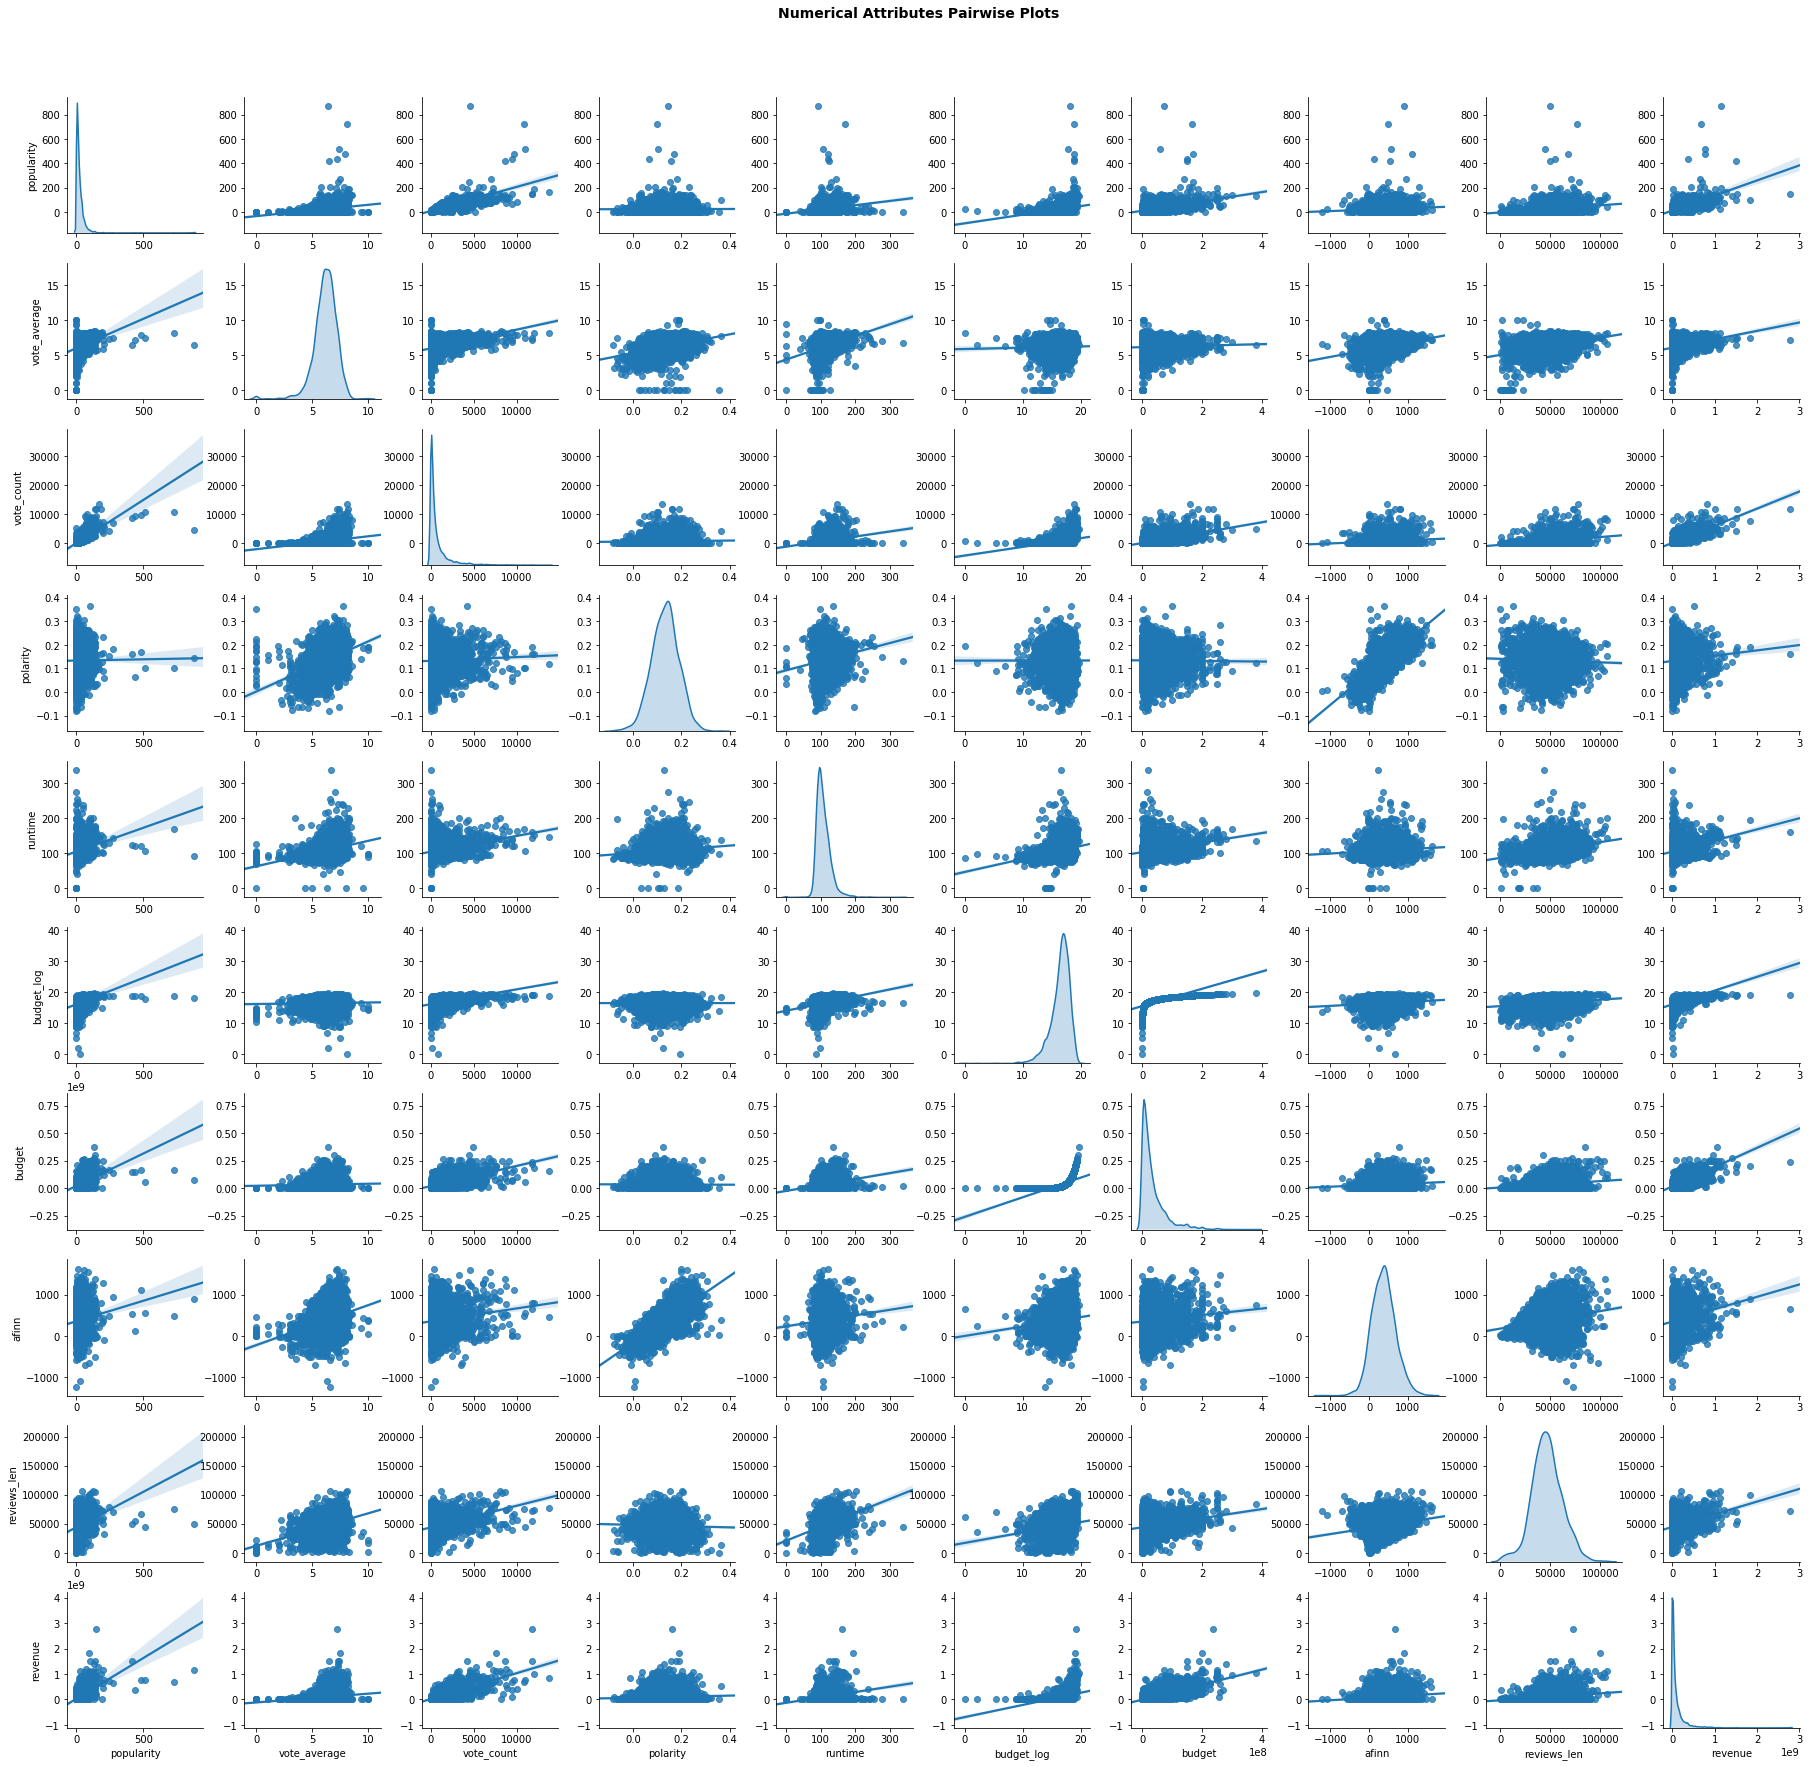

In [30]:
# pair-wise scatter plots with fitted linear regression model
pp = sns.pairplot(dataset[cols], 
                  diag_kind="kde", diag_kws=dict(shade=True),
                  kind="reg") # <-- Fit linear regression models to the scatter plots
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Numerical Attributes Pairwise Plots', fontsize=14, fontweight='bold')

In [31]:
# compute pairwise correlation of columns
corr = dataset[cols].corr()
corr

,popularity,vote_average,vote_count,polarity,runtime,budget_log,budget,afinn,reviews_len,revenue
popularity,1.000000,0.280705,0.768916,0.006299,0.218556,0.347930,0.477133,0.108773,0.269447,0.631946
vote_average,0.280705,1.000000,0.344668,0.379080,0.349880,0.029744,0.044397,0.317216,0.370411,0.203675
vote_count,0.768916,0.344668,1.000000,0.036106,0.280875,0.378352,0.571641,0.132621,0.317559,0.773155
polarity,0.006299,0.379080,0.036106,1.000000,0.142779,0.000810,-0.008829,0.742130,-0.039840,0.068067
runtime,0.218556,0.349880,0.280875,0.142779,1.000000,0.291114,0.271764,0.090885,0.328658,0.258850
budget_log,0.347930,0.029744,0.378352,0.000810,0.291114,1.000000,0.704671,0.121881,0.193319,0.460594
budget,0.477133,0.044397,0.571641,-0.008829,0.271764,0.704671,1.000000,0.106483,0.214289,0.719453
afinn,0.108773,0.317216,0.132621,0.742130,0.090885,0.121881,0.106483,1.000000,0.210898,0.166264
reviews_len,0.269447,0.370411,0.317559,-0.039840,0.328658,0.193319,0.214289,0.210898,1.000000,0.244296
revenue,0.631946,0.203675,0.773155,0.068067,0.258850,0.460594,0.719453,0.166264,0.244296,1.000000


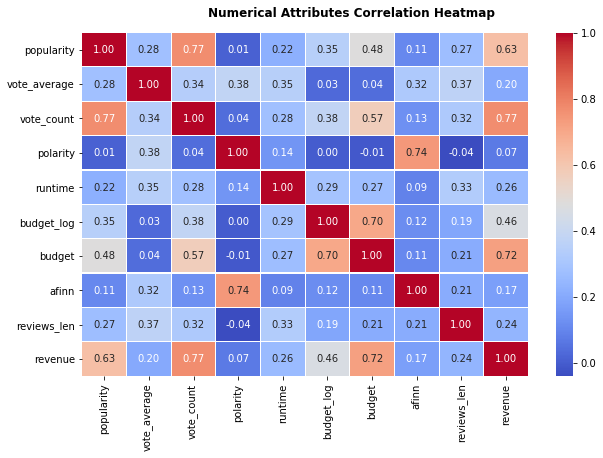

In [32]:
# illustrate with heatmap
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(corr,2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 linewidths=.05)

# spacing super title with the map in fig's real estate
fig.subplots_adjust(top=0.92)

t = fig.suptitle('Numerical Attributes Correlation Heatmap', fontsize=12, fontweight='bold')

Text(0,0.5,'reviews length %')

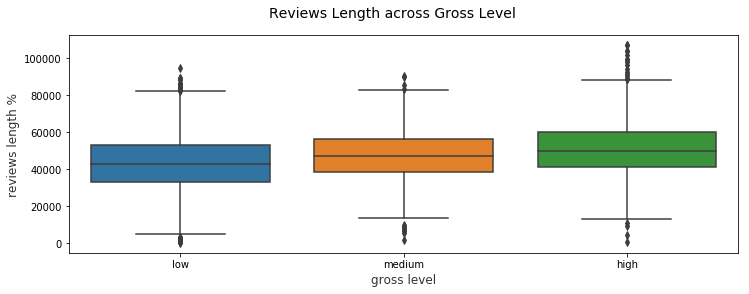

In [33]:
# box plot of reviews length for each gross level
#dataset.boxplot('reviews_len', by='gross_level')

f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Reviews Length across Gross Level', fontsize=14)

sns.boxplot(x="gross_level", y="reviews_len", data=dataset,  ax=ax)
ax.set_xlabel("gross level",size = 12,alpha=0.8)
ax.set_ylabel("reviews length %",size = 12,alpha=0.8)

Text(0,0.5,'afinn score')

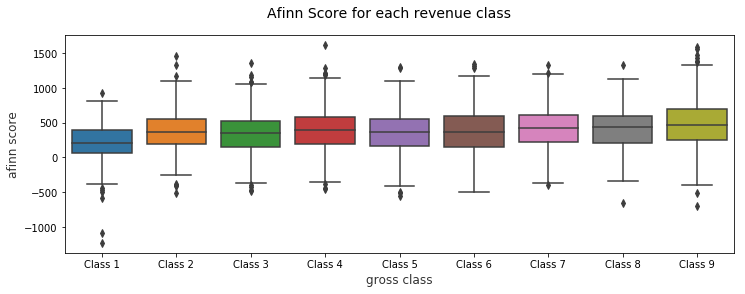

In [143]:
# box plot of afinn score for each revenue class

f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Afinn Score for each revenue class', fontsize=14)

box = sns.boxplot(x='revenue_class', y="afinn", data=dataset, ax=ax, order=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'])
ax.set_xlabel("gross class",size = 12,alpha=0.8)
ax.set_ylabel("afinn score",size = 12,alpha=0.8)

Text(0,0.5,'gross level')

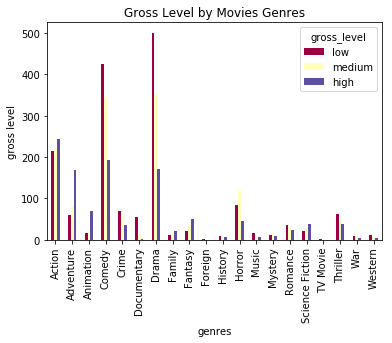

In [34]:
# genres distribution across gross_level
pd.crosstab(dataset.genres_1_name, dataset.gross_level).plot(kind='bar', colormap='Spectral')
plt.title('Gross Level by Movies Genres')
plt.xlabel('genres')
plt.ylabel('gross level')

In [35]:
# list all columns
dataset.columns.values

array(['movie_id', 'original_title', 'budget', 'runtime', 'revenue',
       'original_language', 'overview', 'popularity', 'release_date',
       'status', 'tagline', 'vote_average', 'vote_count', 'genres_1_name',
       'genres_2_name', 'keywords_1_name', 'keywords_2_name',
       'keywords_3_name', 'keywords_4_name', 'keywords_5_name',
       'production_companies_1_name', 'production_companies_2_name',
       'production_country_name', 'director_name', 'music_composer_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'combined_reviews',
       'revenue_class', 'polarity', 'genres', 'keywords',
       'production_companies', 'production_countries', 'cast', 'director',
       'afinn', 'revenue_log', 'budget_log', 'gross_level', 'reviews_len',
       'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History',
       'genre_Horror', 'g

# 3. Model evaluation

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = dataset.drop(['revenue_class'], axis=1, inplace=False)
y = dataset['revenue_class'] # change with 'gross_level' for robustness
X_train, X_new, y_train, y_new = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 123)

In [40]:
y_train.value_counts()

Class 2    539
Class 4    459
Class 9    449
Class 1    385
Class 3    384
Class 5    350
Class 6    309
Class 7    272
Class 8    178
Name: revenue_class, dtype: int64

In [41]:
y_new.value_counts()

Class 2    135
Class 4    115
Class 9    113
Class 3     96
Class 1     96
Class 5     88
Class 6     77
Class 7     68
Class 8     44
Name: revenue_class, dtype: int64

In [42]:
print(X_train.shape)
print(X_new.shape)
print(y_train.shape)
print(y_new.shape)

(3325, 31)
(832, 31)
(3325,)
(832,)


### Extracting features from text using `CountVectorizer`

In [43]:
# define X_text
X_text = X_train.combined_reviews
X_text.head(3)

1134    There is nothing in "The Peacemaker" that is n...
2015    I've seen countless teeny bopper comedies the ...
1069    Michael Caine gives one of his greatest perfor...
Name: combined_reviews, dtype: object

In [44]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [45]:
# import and instantiate Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [46]:
# import and instantiate Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [47]:
# import and instantiate Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123, n_jobs=-1)

### Pipeline

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
# create a pipeline of vectorization and Naive Bayes
pipe_nb_text = Pipeline([('count_vectorizer', vect), ('mnb', nb)])
pipe_nb_text.steps

[('count_vectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [50]:
# show steps in pipe_nb
pipe_nb_text.named_steps.keys()

dict_keys(['count_vectorizer', 'mnb'])

In [51]:
# create a pipeline of vectorization and Logistic Regression
#pipe_lg_text = Pipeline([('count_vectorizer', vect), ('lg', lg)])
#pipe_lg_text.steps

In [52]:
# show steps in pipe_lg
#pipe_lg_text.named_steps.keys()

In [53]:
# create a pipeline of vectorization and Random Forest
pipe_rf_text = Pipeline([('count_vectorizer', vect), ('rf', rf)])
pipe_rf_text.steps

[('count_vectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
          dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
          lowercase=True, max_df=1.0, max_features=None, min_df=1,
          ngram_range=(1, 1), preprocessor=None, stop_words=None,
          strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
          tokenizer=None, vocabulary=None)),
 ('rf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
              oob_score=False, random_state=123, verbose=0, warm_start=False))]

In [54]:
# show steps in pipe_rf
pipe_rf_text.named_steps.keys()

dict_keys(['count_vectorizer', 'rf'])

### GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# create a grid of parameters to search (and specify the pipeline step along with the parameter)
param_grid_nb_text = {}
param_grid_nb_text['count_vectorizer__max_df'] = [0.5, 1]
param_grid_nb_text['mnb__alpha'] = [0.5, 1]
param_grid_nb_text

{'count_vectorizer__max_df': [0.5, 1], 'mnb__alpha': [0.5, 1]}

In [57]:
# nb: pass the pipeline (instead of the model) to GridSearchCV
grid_nb_text = GridSearchCV(pipe_nb_text, param_grid_nb_text, cv=5, scoring='accuracy')

In [58]:
# nb: time the grid search
%time grid_nb_text.fit(X_text, y_train)

Wall time: 13min 17s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), ...nizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'count_vectorizer__max_df': [0.5, 1], 'mnb__alpha': [0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
# nb: examine the score for each combination of parameters
grid_nb_text.grid_scores_

C:\Users\Jolyn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.26045, std: 0.01273, params: {'count_vectorizer__max_df': 0.5, 'mnb__alpha': 0.5},
 mean: 0.26376, std: 0.00482, params: {'count_vectorizer__max_df': 0.5, 'mnb__alpha': 1},
 mean: 0.17654, std: 0.00761, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 0.5},
 mean: 0.18075, std: 0.01196, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 1}]

In [60]:
# nb: print the single best score and parameters that produced that score
print(grid_nb_text.best_score_)
print(grid_nb_text.best_params_)

0.263759398496
{'count_vectorizer__max_df': 0.5, 'mnb__alpha': 1}


In [61]:
# create a grid of parameters to search (and specify the pipeline step along with the parameter)
param_grid_rf_text = {}
param_grid_rf_text['count_vectorizer__max_df'] = [0.5, 1]
param_grid_rf_text['rf__n_estimators'] = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
param_grid_rf_text['rf__bootstrap'] = [True, False]
param_grid_rf_text

{'count_vectorizer__max_df': [0.5, 1],
 'rf__bootstrap': [True, False],
 'rf__n_estimators': [200, 650, 1100, 1550, 2000]}

In [62]:
# rf: pass the pipeline (instead of the model) to GridSearchCV
grid_rf_text = GridSearchCV(pipe_rf_text, param_grid_rf_text, cv=5, scoring='accuracy')

In [63]:
# rf: time the grid search
%time grid_rf_text.fit(X_text, y_train)

Wall time: 5h 11min


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...imators=10, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'count_vectorizer__max_df': [0.5, 1], 'rf__n_estimators': [200, 650, 1100, 1550, 2000], 'rf__bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
# rf: examine the score for each combination of parameters
grid_rf_text.grid_scores_

C:\Users\Jolyn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.27218, std: 0.01697, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': True, 'rf__n_estimators': 200},
 mean: 0.27789, std: 0.01207, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': True, 'rf__n_estimators': 650},
 mean: 0.27970, std: 0.01123, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': True, 'rf__n_estimators': 1100},
 mean: 0.28271, std: 0.01502, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': True, 'rf__n_estimators': 1550},
 mean: 0.28271, std: 0.01342, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': True, 'rf__n_estimators': 2000},
 mean: 0.28180, std: 0.01677, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': False, 'rf__n_estimators': 200},
 mean: 0.28451, std: 0.01165, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': False, 'rf__n_estimators': 650},
 mean: 0.28752, std: 0.00894, params: {'count_vectorizer__max_df': 0.5, 'rf__bootstrap': False, 'rf__n_estimators': 1100},
 mean: 0.28541, std: 0.01

In [65]:
# rf: print the single best score and parameters that produced that score
print(grid_rf_text.best_score_)
print(grid_rf_text.best_params_)

0.287518796992
{'count_vectorizer__max_df': 0.5, 'rf__bootstrap': False, 'rf__n_estimators': 1100}


### RandomizedSearchCV

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
import scipy as sp
param_rand_nb_text = {}
param_rand_nb_text['count_vectorizer__max_df'] = [0.3, 0.5, 1]
param_rand_nb_text['mnb__alpha'] = sp.stats.uniform(scale=1) # create uniform continuous distribution between 0 and 1
param_rand_nb_text

{'count_vectorizer__max_df': [0.3, 0.5, 1],
 'mnb__alpha': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e2c8c95908>}

In [68]:
# set a random seed for sp.stats.uniform
np.random.seed(1)

In [69]:
# nb: pass the pipeline (instead of the model) to RandomSearchCV
rand_nb_text = RandomizedSearchCV(pipe_nb_text, param_rand_nb_text, cv=5, scoring='accuracy', n_iter=5, random_state=123)

In [70]:
# nb: time the randomized search
%time rand_nb_text.fit(X_text, y_train)

Wall time: 17min 59s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), ...nizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'count_vectorizer__max_df': [0.3, 0.5, 1], 'mnb__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E2C8C95908>},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [71]:
# nb: examine the score for each combination of parameters
rand_nb_text.grid_scores_

C:\Users\Jolyn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.17955, std: 0.01172, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 0.71295532052322719},
 mean: 0.17083, std: 0.01112, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 0.22685145356420311},
 mean: 0.17955, std: 0.01172, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 0.71915031015477304},
 mean: 0.17654, std: 0.00997, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 0.42310646012446096},
 mean: 0.17654, std: 0.00987, params: {'count_vectorizer__max_df': 1, 'mnb__alpha': 0.41092437270901894}]

In [72]:
# nb: print the single best score and parameters that produced that score
print(rand_nb_text.best_score_)
print(rand_nb_text.best_params_)

0.17954887218
{'count_vectorizer__max_df': 1, 'mnb__alpha': 0.71295532052322719}


In [73]:
param_rand_rf_text = {}
param_rand_rf_text['count_vectorizer__max_df'] = [0.3, 0.5, 1]
param_rand_rf_text['rf__n_estimators'] = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
param_rand_rf_text['rf__bootstrap'] = [True, False]
param_rand_rf_text

{'count_vectorizer__max_df': [0.3, 0.5, 1],
 'rf__bootstrap': [True, False],
 'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [74]:
# rf: pass the pipeline (instead of the model) to RandomSearchCV
rand_rf_text = RandomizedSearchCV(pipe_rf_text, param_rand_rf_text, cv=5, scoring='accuracy', n_iter=5, random_state=123)

In [75]:
# rf: time the randomized search
%time rand_rf_text.fit(X_text, y_train)

Wall time: 1h 55min 35s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...imators=10, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'count_vectorizer__max_df': [0.3, 0.5, 1], 'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [76]:
# rf: examine the score for each combination of parameters
rand_rf_text.grid_scores_

C:\Users\Jolyn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.28180, std: 0.01133, params: {'rf__n_estimators': 1000, 'rf__bootstrap': True, 'count_vectorizer__max_df': 0.5},
 mean: 0.28421, std: 0.01062, params: {'rf__n_estimators': 2000, 'rf__bootstrap': False, 'count_vectorizer__max_df': 0.5},
 mean: 0.28391, std: 0.01531, params: {'rf__n_estimators': 1200, 'rf__bootstrap': False, 'count_vectorizer__max_df': 0.3},
 mean: 0.28150, std: 0.01367, params: {'rf__n_estimators': 400, 'rf__bootstrap': False, 'count_vectorizer__max_df': 0.5},
 mean: 0.12812, std: 0.00766, params: {'rf__n_estimators': 800, 'rf__bootstrap': True, 'count_vectorizer__max_df': 1}]

In [77]:
# rf: print the single best score and parameters that produced that score
print(rand_rf_text.best_score_)
print(rand_rf_text.best_params_)

0.284210526316
{'rf__n_estimators': 2000, 'rf__bootstrap': False, 'count_vectorizer__max_df': 0.5}


### Adding features to a document-term matrix (using SciPy)

In [78]:
# define a function that accepts a DataFrame returns the manually created features
def get_manual(df):
    return df.loc[:, ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'polarity', 'afinn', 'reviews_len', 'genre_Action', 'genre_Adventure', 'genre_Animation','genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama','genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History','genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance','genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller','genre_War', 'genre_Western']]
    #return df.loc[:, ['budget', 'runtime', 'popularity', 'vote_average', 'vote_count', 'polarity', 'afinn', 'budget_log', 'reviews_len', 'genre_Action', 'genre_Adventure', 'genre_Animation','genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama','genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History','genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance','genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller','genre_War', 'genre_Western']]

In [79]:
from sklearn.preprocessing import FunctionTransformer

In [80]:
# create a stateless transformer from the get_manual function
get_manual_ft = FunctionTransformer(get_manual, validate=False)
type(get_manual_ft)

sklearn.preprocessing._function_transformer.FunctionTransformer

In [81]:
# execute the function using the transform method
get_manual_ft.transform(X_train).head()

,budget,runtime,popularity,vote_average,vote_count,polarity,afinn,reviews_len,genre_Action,genre_Adventure,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
1134,50000000,124,15.931084,5.8,255,0.095159,79.0,41611,1,0,...,0,0,0,0,0,0,0,0,0,0
2015,20000000,100,8.244324,5.6,111,0.112115,624.0,39480,0,0,...,0,0,0,0,0,0,0,0,0,0
1069,26000000,101,1.492056,5.5,34,0.137980,284.0,42955,0,0,...,0,0,0,0,0,0,0,0,0,0
3907,112000000,85,22.845143,4.9,621,0.078886,344.0,39646,0,0,...,0,0,0,0,0,0,0,0,0,0
4314,160000000,148,167.583710,8.1,13752,0.119364,466.0,77493,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# define a function that accepts a DataFrame returns the combined_reviews
def get_text(df):
    return df.combined_reviews

In [83]:
# create and test another transformer
get_text_ft = FunctionTransformer(get_text, validate=False)
get_text_ft.transform(X_train).head()

1134    There is nothing in "The Peacemaker" that is n...
2015    I've seen countless teeny bopper comedies the ...
1069    Michael Caine gives one of his greatest perfor...
3907    First things first: if you are watching Jack B...
4314    I'd like to keep my review rather to the point...
Name: combined_reviews, dtype: object

### Combine feature extraction steps

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union

In [85]:
# get optimal parameter from above
vect_opt = CountVectorizer(max_df=0.5)# insert optimal parameters

In [86]:
# this is identical to a FeatureUnion with just one transformer
union_try = make_union(vect_opt)
X_dtm = union_try.fit_transform(X_text)
X_dtm.shape

(3325, 147502)

In [87]:
# properly combine the transformers into a FeatureUnion
from sklearn.pipeline import make_pipeline
union = make_union(make_pipeline(get_text_ft, vect_opt), get_manual_ft)
X_dtm_manual = union.fit_transform(X_train)
X_dtm_manual.shape

(3325, 147530)

In [88]:
# get optimal parameter from above
rf_opt = RandomForestClassifier(random_state=123, n_estimators=2000, n_jobs=-1)# insert optimal parameters

In [89]:
# create another pipeline for FeatureUnion and Random Forest
pipe_combine = make_pipeline(union, rf_opt)

In [90]:
# properly cross-validate the entire pipeline (and pass it the entire DataFrame)
from sklearn.model_selection import cross_val_score
cross_val_score(pipe_combine, X_train, y_train, cv=5, scoring='accuracy').mean()

0.30734680214282517

# 4. Make predictions for new data

In [91]:
from sklearn import metrics

In [92]:
# define a function that calculates the metrics of interest

def get_results(classifier, X_train, y_train, X_test, y_test):
    # fit classifier
    classifier.fit(X_train, y_train)
    
    # make class predictions for X_test
    y_pred_class = classifier.predict(X_test)
    
    # store the predicted probabilities
    #y_pred_prob = classifier.predict_proba(X_test)
    
    # print confusion matrix of its predictions
    print('Confusion matrix: \n', metrics.confusion_matrix(y_test, y_pred_class))
    
    # print Accuracy
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    
    # print AUC - percentage of ROC plot that is underneath the curve
    #print('AUC: ', metrics.roc_auc_score(y_test, y_pred_prob))
    
    # print one-away accuracy
    cm = metrics.confusion_matrix(y_test, y_pred_class)
    accuracy_1away = (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[3,2]+cm[2,3]+cm[3,3]+cm[4,3]+cm[3,4]+cm[4,4]+cm[4,5]+cm[5,4]+cm[5,5]+cm[5,6]+cm[6,5]+cm[6,6]+cm[6,7]+cm[7,6]+cm[7,7]+cm[7,8]+cm[8,7]+cm[8,8])/len(y_test)
    print('1-Away Accuracy: \n', accuracy_1away)

## 4.1 Predict based on text 'combined_reviews' column

In [93]:
X_new_text = X_new.combined_reviews

In [94]:
# print the best model found by RandomizedSearchCV
rand_rf_text.best_estimator_

Pipeline(memory=None,
     steps=[('count_vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
 ...ators=2000, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [95]:
# predicted class
new_pred_class_rand = rand_rf_text.predict(X_new_text)
new_pred_class_rand

array(['Class 2', 'Class 4', 'Class 2', 'Class 4', 'Class 4', 'Class 2',
       'Class 2', 'Class 2', 'Class 1', 'Class 9', 'Class 2', 'Class 1',
       'Class 9', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 4',
       'Class 2', 'Class 9', 'Class 2', 'Class 2', 'Class 9', 'Class 2',
       'Class 2', 'Class 2', 'Class 9', 'Class 9', 'Class 1', 'Class 2',
       'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2', 'Class 2',
       'Class 2', 'Class 1', 'Class 9', 'Class 9', 'Class 2', 'Class 1',
       'Class 2', 'Class 2', 'Class 9', 'Class 2', 'Class 2', 'Class 9',
       'Class 2', 'Class 4', 'Class 4', 'Class 2', 'Class 9', 'Class 2',
       'Class 4', 'Class 4', 'Class 2', 'Class 9', 'Class 2', 'Class 2',
       'Class 9', 'Class 9', 'Class 2', 'Class 2', 'Class 1', 'Class 1',
       'Class 9', 'Class 2', 'Class 2', 'Class 9', 'Class 2', 'Class 2',
       'Class 2', 'Class 4', 'Class 1', 'Class 9', 'Class 2', 'Class 9',
       'Class 9', 'Class 1', 'Class 2', 'Class 2', 

In [96]:
# predicted class probabilities
new_pred_prob_rand = rand_rf_text.predict_proba(X_new_text)
new_pred_prob_rand

array([[ 0.155  ,  0.2105 ,  0.1565 , ...,  0.0675 ,  0.031  ,  0.059  ],
       [ 0.076  ,  0.116  ,  0.11325, ...,  0.0925 ,  0.0565 ,  0.1465 ],
       [ 0.1885 ,  0.1995 ,  0.12125, ...,  0.0715 ,  0.035  ,  0.057  ],
       ..., 
       [ 0.074  ,  0.1075 ,  0.11   , ...,  0.088  ,  0.062  ,  0.2055 ],
       [ 0.6965 ,  0.095  ,  0.051  , ...,  0.015  ,  0.0055 ,  0.0445 ],
       [ 0.11775,  0.1905 ,  0.1115 , ...,  0.09   ,  0.051  ,  0.1035 ]])

In [97]:
# print confusion matrix of its predictions
print('Confusion matrix: \n', metrics.confusion_matrix(y_new, new_pred_class_rand))

Confusion matrix: 
 [[ 37  55   0   2   0   0   0   0   2]
 [ 13 110   1   0   0   0   1   0  10]
 [  3  77   1   4   0   0   0   0  11]
 [  6  83   1   9   0   0   0   0  16]
 [  2  53   0  13   0   0   0   0  20]
 [  2  48   0   6   1   0   0   0  20]
 [  3  26   1   5   0   0   0   0  33]
 [  2  16   0   7   0   0   0   0  19]
 [  0  23   0   8   0   0   0   0  82]]


In [98]:
# print accuracy
print('Accuracy: \n', metrics.accuracy_score(y_new, new_pred_class_rand))

Accuracy: 
 0.287259615385


In [99]:
# one-away accuracy
cm = metrics.confusion_matrix(y_new, new_pred_class_rand)
accuracy_1away = (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[3,2]+cm[2,3]+cm[3,3]+cm[4,3]+cm[3,4]+cm[4,4]+cm[4,5]+cm[5,4]+cm[5,5]+cm[5,6]+cm[6,5]+cm[6,6]+cm[6,7]+cm[7,6]+cm[7,7]+cm[7,8]+cm[8,7]+cm[8,8])/len(y_new)
print('1-Away Accuracy: \n', accuracy_1away)

1-Away Accuracy: 
 0.508413461538


## 4.2 Predict based on text 'combined_reviews' + features columns in dataset

In [100]:
X_new_dtm = union.transform(X_new)
X_new_dtm.shape

(832, 147530)

In [101]:
rf_opt.fit(X_dtm_manual, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [102]:
comb_pred_class = rf_opt.predict(X_new_dtm)

In [103]:
print('Confusion matrix: \n', metrics.confusion_matrix(y_new, comb_pred_class))

Confusion matrix: 
 [[ 38  55   0   1   0   0   0   0   2]
 [ 13 113   1   1   0   0   1   0   6]
 [  5  80   0   4   0   0   0   0   7]
 [  5  78   4  16   0   0   0   0  12]
 [  1  52   0  12   3   0   0   0  20]
 [  2  32   0  16   1   0   0   0  26]
 [  2  14   1  10   1   0   0   0  40]
 [  1  13   0   6   0   0   0   0  24]
 [  0  11   0  10   0   0   0   0  92]]


In [104]:
print('Accuracy: ', metrics.accuracy_score(y_new, comb_pred_class))

Accuracy:  0.314903846154


In [105]:
cm = metrics.confusion_matrix(y_new, comb_pred_class)
accuracy_1away = (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[3,2]+cm[2,3]+cm[3,3]+cm[4,3]+cm[3,4]+cm[4,4]+cm[4,5]+cm[5,4]+cm[5,5]+cm[5,6]+cm[6,5]+cm[6,6]+cm[6,7]+cm[7,6]+cm[7,7]+cm[7,8]+cm[8,7]+cm[8,8])/len(y_new)
print('1-Away Accuracy: \n', accuracy_1away)

1-Away Accuracy: 
 0.548076923077


In [106]:
%time rf_2_results =  get_results(rf_opt, X_dtm_manual, y_train, X_new_dtm, y_new)

Confusion matrix: 
 [[ 38  55   0   1   0   0   0   0   2]
 [ 13 113   1   1   0   0   1   0   6]
 [  5  80   0   4   0   0   0   0   7]
 [  5  78   4  16   0   0   0   0  12]
 [  1  52   0  12   3   0   0   0  20]
 [  2  32   0  16   1   0   0   0  26]
 [  2  14   1  10   1   0   0   0  40]
 [  1  13   0   6   0   0   0   0  24]
 [  0  11   0  10   0   0   0   0  92]]
Accuracy:  0.314903846154
1-Away Accuracy: 
 0.548076923077
Wall time: 5min 18s


## 4.3 Build model based on features from dataset (without combined_reviews column)

In [107]:
X_train_feat = get_manual(X_train)

In [108]:
X_new_feat = get_manual(X_new)

In [109]:
print(X_train_feat.shape)
print(X_new_feat.shape)

(3325, 28)
(832, 28)


In [110]:
rf_features = RandomForestClassifier(n_estimators=2000, random_state=123, n_jobs=-1)

In [111]:
%time rf_3_results =  get_results(rf_features, X_train_feat, y_train, X_new_feat, y_new)

Confusion matrix: 
 [[ 57  29   4   3   1   2   0   0   0]
 [ 25  64  13  22   4   4   3   0   0]
 [  4  42  15  27   4   4   0   0   0]
 [  4  20  19  34  14  16   6   1   1]
 [  0  12  11  26  15  12   5   2   5]
 [  0   0   3  10  15  16  20   3  10]
 [  0   1   1   9   9  10  11   5  22]
 [  0   0   0   3   3  12   6   2  18]
 [  0   0   0   2   1   3   7   0 100]]
Accuracy:  0.377403846154
1-Away Accuracy: 
 0.715144230769
Wall time: 26 s


In [ ]:
features = X_train_feat.columns
importances = rf_features.feature_importances_
indices = np.argsort(importances)

figure = plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
figure.set_size_inches(12.5, 8.5)
figure.savefig('Relative Importance_1.jpg', dpi=100)

## 4.4 Ensemble models

In [113]:
# predicted probabilities from RF on 'combined_reviews' text
new_pred_prob_rand

array([[ 0.155  ,  0.2105 ,  0.1565 , ...,  0.0675 ,  0.031  ,  0.059  ],
       [ 0.076  ,  0.116  ,  0.11325, ...,  0.0925 ,  0.0565 ,  0.1465 ],
       [ 0.1885 ,  0.1995 ,  0.12125, ...,  0.0715 ,  0.035  ,  0.057  ],
       ..., 
       [ 0.074  ,  0.1075 ,  0.11   , ...,  0.088  ,  0.062  ,  0.2055 ],
       [ 0.6965 ,  0.095  ,  0.051  , ...,  0.015  ,  0.0055 ,  0.0445 ],
       [ 0.11775,  0.1905 ,  0.1115 , ...,  0.09   ,  0.051  ,  0.1035 ]])

In [114]:
# predicted probabilities from RF on feature cols
new_pred_prob_feat = rf_features.predict_proba(X_new_feat)

In [115]:
# calculate the mean of the predicted probabilities for all rows
new_pred_prob = pd.DataFrame((new_pred_prob_rand + new_pred_prob_feat) / 2, columns=rf_features.classes_)
new_pred_prob.head()

,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9
0,0.270000,0.311500,0.138500,0.112750,0.05250,0.03475,0.03400,0.01650,0.02950
1,0.047250,0.110250,0.141625,0.195375,0.15350,0.14475,0.07250,0.05700,0.07775
2,0.164000,0.176250,0.238875,0.191625,0.08450,0.05600,0.04175,0.01825,0.02875
3,0.153750,0.266250,0.145875,0.200125,0.07000,0.04850,0.03575,0.02450,0.05525
4,0.047125,0.063875,0.081250,0.139000,0.16475,0.14075,0.13375,0.10575,0.12375


In [116]:
# for each row, find the column with the highest predicted probability
new_pred_class = new_pred_prob.apply(np.argmax, axis=1)
new_pred_class.head()

0    Class 2
1    Class 4
2    Class 3
3    Class 2
4    Class 5
dtype: object

In [117]:
print('Confusion matrix: \n', metrics.confusion_matrix(y_new, new_pred_class))

Confusion matrix: 
 [[ 51  35   3   5   1   1   0   0   0]
 [ 21  77   7  20   4   3   2   0   1]
 [  4  47  12  27   4   2   0   0   0]
 [  5  25  14  41  10  13   3   1   3]
 [  0  20   6  28  17   8   1   0   8]
 [  1   1   3  15  16  13  14   1  13]
 [  1   0   1  11   8   9   6   2  30]
 [  0   0   0   4   4  10   4   1  21]
 [  0   1   0   4   1   2   4   0 101]]


In [118]:
print('Accuracy: ', metrics.accuracy_score(y_new, new_pred_class))

Accuracy:  0.383413461538


In [119]:
cm = metrics.confusion_matrix(y_new, new_pred_class)
accuracy_1away = (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]+cm[3,2]+cm[2,3]+cm[3,3]+cm[4,3]+cm[3,4]+cm[4,4]+cm[4,5]+cm[5,4]+cm[5,5]+cm[5,6]+cm[6,5]+cm[6,6]+cm[6,7]+cm[7,6]+cm[7,7]+cm[7,8]+cm[8,7]+cm[8,8])/len(y_new)
print('1-Away Accuracy: \n', accuracy_1away)

1-Away Accuracy: 
 0.699519230769
